In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("failure.csv")

In [3]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


### EDA

In [4]:
df.shape

(124494, 12)

In [5]:
df.sample(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
40530,2015-02-23,S1F0GJL9,0,218493200,0,0,0,63,242184,0,0,0
31817,2015-02-10,W1F0P24E,0,211702576,0,0,2,34,245113,0,0,0
114568,2015-08-20,S1F0RSWJ,0,137130752,0,0,0,13,308074,0,0,0
121409,2015-09-30,S1F11S5B,0,19559496,0,0,0,12,247472,0,0,0
28568,2015-02-05,Z1F18YST,0,219437944,0,0,0,8,227867,0,0,0
109116,2015-08-02,S1F0TPMF,0,93365000,0,0,0,6,298821,0,0,0
39328,2015-02-21,S1F0XMNV,0,185505696,0,0,0,7,25,0,0,0
48177,2015-03-06,S1F13HPP,0,234610248,0,0,0,10,220870,0,0,2
3316,2015-01-03,Z1F0LBBG,0,180167448,0,0,0,6,292619,0,0,0
69741,2015-04-13,S1F0BVK1,0,150990152,0,0,0,6,261816,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [8]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

### Feature Engineering

In [9]:
df.date = pd.to_datetime(df.date)

In [10]:
df['month'] = df['date'].dt.month

In [11]:
del df["date"]

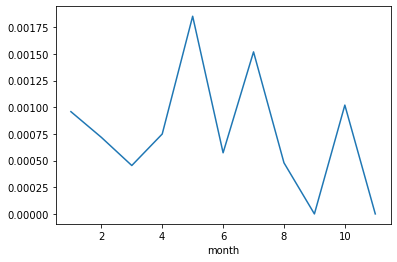

In [12]:
df.groupby('month')['failure'].mean().plot();

May, July & October months have peak value for failure.

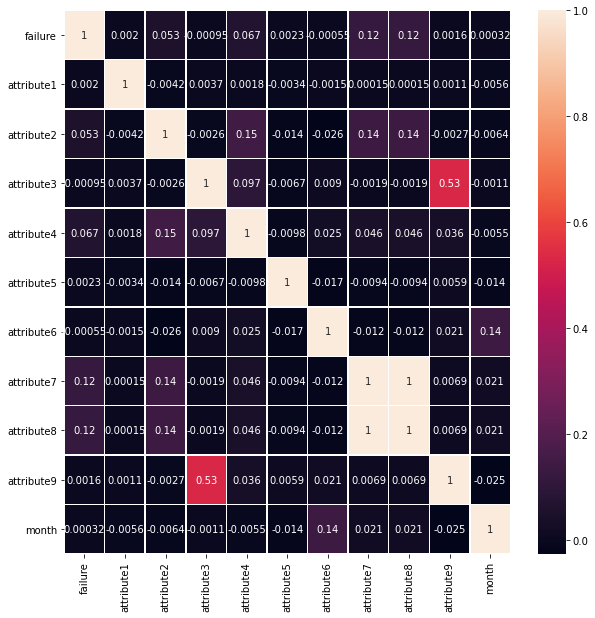

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
corr = df[df.columns].corr()
sns.heatmap(corr, annot=True, linewidth=.5);

Attribute 7 and 8 are hightly correlated so probably they have same values. We will need to drop one of them.

In [14]:
del df["attribute8"]

In [15]:
df.device.sample(10)

119856    Z1F0QLC1
26161     W1F0VL6W
90742     W1F1BRM3
50207     S1F13KBJ
88177     S1F122HQ
110328    Z1F0N5AD
109181    S1F13K8E
13039     S1F0S0NC
73123     Z1F0ZCPW
7684      S1F0F4EB
Name: device, dtype: object

It seems all of them start with one of S1F, W1F, Z1F.
We can make a new column from this.

In [16]:
df["device model"] = df.device.str[:3]

In [17]:
df["device model"].sample(10)

119013    S1F
119865    Z1F
56088     S1F
39735     Z1F
105567    W1F
39416     S1F
80294     S1F
30162     S1F
70353     W1F
102241    W1F
Name: device model, dtype: object

In [18]:
del df["device"]

In [19]:
df = pd.get_dummies(df, drop_first=True)

In [20]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

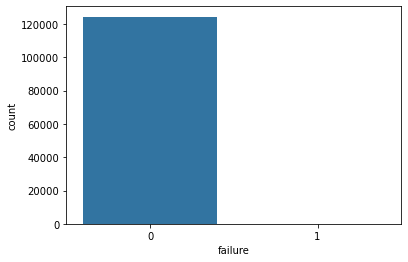

In [21]:
sns.countplot(x='failure',data=df);

### Oversampling with SMOTE

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [23]:
y = df["failure"]
x = df.drop("failure", axis=1)

In [24]:
sm = SMOTE()
x_sm, y_sm = sm.fit_sample(x, y)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size = 0.25,random_state = 42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
r.fit(x_train, y_train)
y_pred = r.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

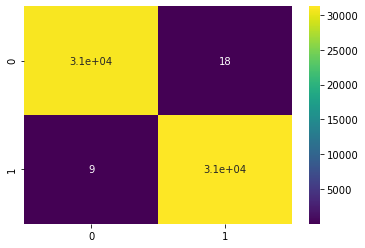

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True);

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30950
           1       1.00      1.00      1.00     31244

    accuracy                           1.00     62194
   macro avg       1.00      1.00      1.00     62194
weighted avg       1.00      1.00      1.00     62194



In [31]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(x_train, y_train)
y_pred = d.predict(x_test)

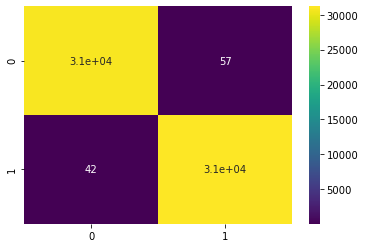

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True);

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30950
           1       1.00      1.00      1.00     31244

    accuracy                           1.00     62194
   macro avg       1.00      1.00      1.00     62194
weighted avg       1.00      1.00      1.00     62194



In [34]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
k.fit(x_train, y_train)
y_pred = k.predict(x_test)

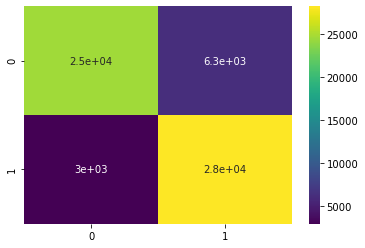

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True);

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     30950
           1       0.82      0.90      0.86     31244

    accuracy                           0.85     62194
   macro avg       0.85      0.85      0.85     62194
weighted avg       0.85      0.85      0.85     62194



In [37]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
regmodel = l.fit(x_train, y_train)
y_pretest = l.predict(x_test)

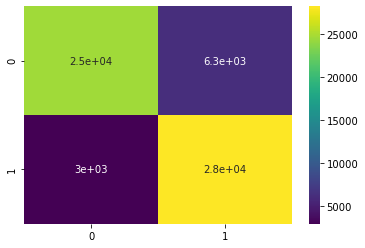

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True);

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     30950
           1       0.82      0.90      0.86     31244

    accuracy                           0.85     62194
   macro avg       0.85      0.85      0.85     62194
weighted avg       0.85      0.85      0.85     62194

